# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Sarah Howard

### Github Repository: https://github.com/sapapesh/WebMining.Mod7

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [8]:
import matplotlib.pyplot as plt
import json
import pickle
import requests
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from collections import Counter
from bs4 import BeautifulSoup

!pip list
print('All prereqs installed.')

Package            Version
------------------ ------------
annotated-types    0.7.0
asttokens          3.0.0
beautifulsoup4     4.12.3
blis               1.0.1
catalogue          2.0.10
certifi            2024.8.30
charset-normalizer 3.4.0
click              8.1.7
cloudpathlib       0.20.0
colorama           0.4.6
comm               0.2.2
confection         0.1.5
contourpy          1.3.1
cycler             0.12.1
cymem              2.0.10
debugpy            1.8.9
decorator          5.1.1
en_core_web_sm     3.8.0
executing          2.1.0
fonttools          4.55.0
html5lib           1.1
idna               3.10
ipykernel          6.29.5
ipython            8.30.0
jedi               0.19.2
Jinja2             3.1.4
joblib             1.4.2
jupyter_client     8.6.3
jupyter_core       5.7.2
kiwisolver         1.4.7
langcodes          3.5.0
language_data      1.3.0
marisa-trie        1.2.1
markdown-it-py     3.0.0
MarkupSafe         3.0.2
matplotlib         3.9.3
matplotlib-inline  0.1.7
mdurl 

### Question 1

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [5]:
result = json.loads(requests.get('https://api.lyrics.ovh/v1/Ed%20Sheeran/Perfect').text)

# Write the result to a JSON file
with open('perfect_lyrics.json', 'w') as json_file:
    json.dump(result, json_file, indent=4)



### Question 2

2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [17]:
# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Add the TextBlob component to spaCy pipeline
nlp.add_pipe('spacytextblob')

# Read the contents of the JSON file
with open('perfect_lyrics.json', 'r') as json_file:
    data = json.load(json_file)

# Extract the lyrics from the response
lyrics = data.get('lyrics', '')

# Count the number of sentences
num_sentences = len(list(doc.sents))

print(f"The number of sentences in the song is {num_sentences}")

# Perform sentiment analysis using spaCyTextBlob
doc = nlp(lyrics)
polarity = doc._.blob.polarity

# Print the polarity score
print("\nPolarity score of the sentiment analysis:")
print(polarity)

# Determine if the sentiment is positive, negative, or neutral.
if polarity > 0:
    sentiment = "positive"
elif polarity < 0:
    sentiment = "negative"
else:
    sentiment = "neutral"
print(f"The sentiment for the song lyrics is {sentiment}.")



The number of sentences in the song is 9

Polarity score of the sentiment analysis:
0.44442857142857145
The sentiment for the song lyrics is positive.


### Question 3

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [20]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Process the article text with the spaCy pipeline
doc = nlp(lyrics)

# Define the tokens we care about
def we_care_about(token):
    return not (
        token.is_space or 
        token.is_punct or 
        token.is_stop or 
        token.like_num  # Exclude numbers
    )

# Get the interesting tokens (filtered tokens)
interesting_tokens = [token for token in doc if we_care_about(token)]

# Create a frequency count of the interesting tokens (converted to lowercase)
word_freq = Counter(map(lambda token: str(token).lower(), interesting_tokens))

# Get the 5 most common tokens
mostFreqtokens = word_freq.most_common(5)

# Print the common tokens and their frequencies
print("Top 5 Most Frequent Tokens:")
for token, freq in mostFreqtokens:
    print(f"Token: '{token}', Frequency: {freq}")

Top 5 Most Frequent Tokens:
Token: 'love', Frequency: 5
Token: 'darling', Frequency: 5
Token: 'found', Frequency: 4
Token: 'perfect', Frequency: 4
Token: 'baby', Frequency: 3


### Question 4

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [21]:
# Extract the lemmas (base forms) of the interesting tokens
lemmas = [token.lemma_.lower() for token in interesting_tokens]

# Create a frequency count of the lemmas
lemma_freq = Counter(lemmas)

# Get the 5 most common lemmas
most_common_lemmas = lemma_freq.most_common(5)

# Print the common lemmas and their frequencies
print("Top 5 Most Frequent Lemmas:")
for lemma, freq in most_common_lemmas:
    print(f"Lemma: '{lemma}', Frequency: {freq}")

Top 5 Most Frequent Lemmas:
Lemma: 'look', Frequency: 6
Lemma: 'love', Frequency: 5
Lemma: 'darling', Frequency: 5
Lemma: 'know', Frequency: 5
Lemma: 'find', Frequency: 4


### Question 5

5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

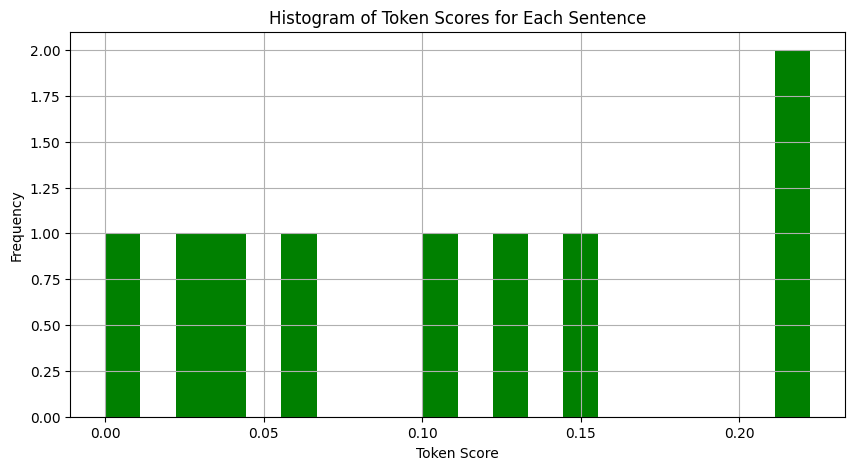

In [34]:
# Interesting tokens from question 3
interesting_tokens = ["love", "darling", "found", "perfect", "baby"]

# Method to score by token
def score_sentence_by_token(sentence, interesting_tokens):
    tokens = [token.text.lower() for token in sentence if not token.is_punct and not token.is_space]
    if len(tokens) == 0:
        return 0
    interesting_count = sum(1 for token in tokens if token in interesting_tokens)
    return interesting_count / len(tokens)

# List to store token scores of each sentence
token_scores = []

# Get scores for all sentences in the article
for sentence in doc.sents:
    score = score_sentence_by_token(sentence, interesting_tokens)
    token_scores.append(score)

# Plot the histogram
plt.figure(figsize=(10,5))
plt.hist(token_scores, bins=20, color='green')
plt.title("Histogram of Token Scores for Each Sentence")
plt.xlabel("Token Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

## The most common range of scores seems to be between .20-.25.

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?